<a href="https://colab.research.google.com/github/dhkdsns20/AI-study/blob/main/Ch_3_Regression_algorithms_and_model_regulation(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ch.3 회귀 알고리즘과 모델 규제
(1) k-최근접 이웃 회귀
(2) 선형회귀
(3) 특성 공학과 규제

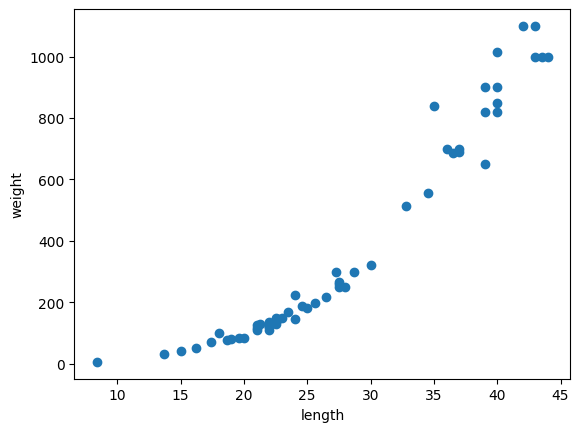

In [2]:
"""# k- 최근접 이웃 회귀"""

"""## 데이터 준비"""

import numpy as np

# 특성 : 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 타깃 : 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 산점도
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
# 훈련 세트 준비

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)      # 1차원 배열

(4,)


In [7]:
test_array = test_array.reshape(2,2)
print(test_array.shape)      # 2차원 배열로 변경

(2, 2)


In [8]:
# 2차원 배열로 변경

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [9]:
# 결정계수(R^2)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 모델 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [10]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [11]:
# 과대적합 vs 과소적합

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
# 과소적합

0.9698823289099254
0.992809406101064


In [12]:
# 이웃의 개수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


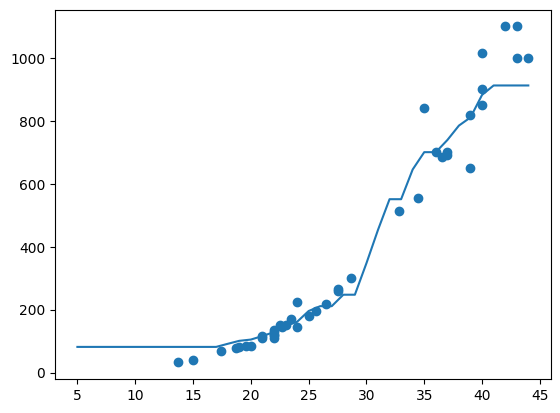

In [17]:
"""### 추가문제"""

# k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1,5,10 일 때 예측 결과를 그래프로 그립니다.

# 모델을 훈련합니다.
knr.n_neighbors = 10
knr.fit(train_input, train_target)

# 지정한 범위 x에 대한 예측을 구합니다.
prediction = knr.predict(x)

# 훈련 세트와 예측 결과를 그래프로 그립니다.
plt.scatter(train_input, train_target)
plt.plot(x, prediction)
